In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# load data from csv file
s_alpha = pd.read_csv('./S(a)_1_pirBN_200eV.csv')
s_alpha.head()

,x,y
0,-1.008198,0.984338
1,2.869070,0.981584
2,7.597072,1.013392
3,12.447961,1.068558
4,18.269888,1.146479


In [7]:
s_energy = pd.read_csv("./S_m_BGP.csv")
s_energy.head()

,x,y
0,6.583072,0.006121
1,27.742947,0.007613
2,50.313480,0.009376
3,68.181818,0.010733
4,86.050157,0.012361


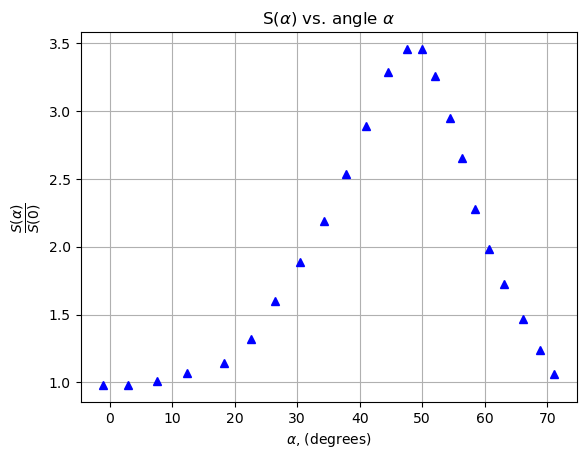

In [8]:
plt.plot(s_alpha['x'], s_alpha['y'], marker='^', color='blue', linestyle='None', label=r'S($\alpha$)')
plt.title(r'S($\alpha$) vs. angle $\alpha$')
plt.xlabel(r'$\alpha$, (degrees)')
plt.ylabel(r'$\dfrac{S(\alpha)}{S(0)}$')
plt.grid(True)
plt.show()

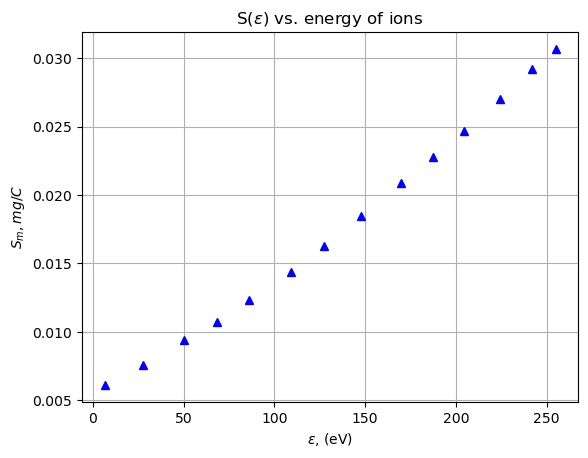

In [9]:
plt.plot(s_energy['x'], s_energy['y'], marker='^', color='blue', linestyle='None', label=r'S($\alpha$)')
plt.title(r'S($\epsilon$) vs. energy of ions')
plt.xlabel(r'$\epsilon$, (eV)')
plt.ylabel(r'$S_m, mg/C$')
plt.grid(True)
plt.show()

In [10]:
n = min(len(s_alpha), len(s_energy))
x_start = 12.03
x_end = 90
j_x_coords = np.linspace(x_start, x_end, n)
# y_coords is y(x) = x**2 with some noise
j_y_coords = j_x_coords**2 + np.random.normal(0, 1, n) * 25
print(n)

14


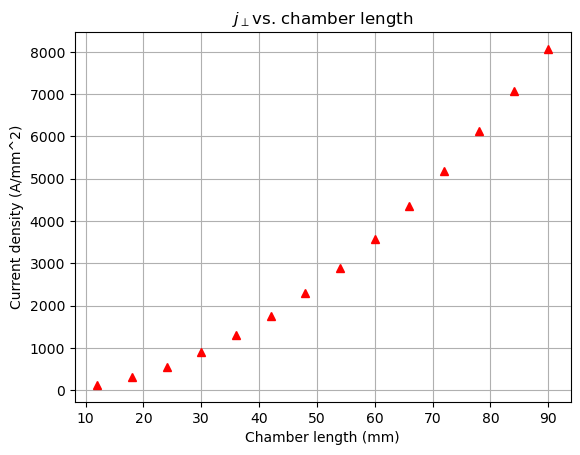

In [11]:
plt.plot(j_x_coords, j_y_coords, marker='^', color='red', linestyle='None', label='Current density')
plt.title(r"$j_{\perp}$vs. chamber length")
plt.xlabel("Chamber length (mm)")
plt.ylabel("Current density (A/mm^2)")
plt.grid()
plt.show()

In [12]:
from contourLoader import ContourLoader as cl
import ezdxf
chamber_start = 12.03
chamber_end = 102.03
path = ".\ht_Contour\ceramics.dxf"
contour = cl(path)
spt_100_contour = contour.load_contour_data()
plt.plot(spt_100_contour[:,0],spt_100_contour[:,1],\
            color='black', linewidth=1, linestyle='-')
plt.plot(chamber_start, 22.85, 'o', color='blue', markersize=10)
plt.grid()
plt.axis('equal')
plt.show()

ModuleNotFoundError: No module named 'ezdxf'

In [ ]:
def wall_coord(x, tau):
    return s_alpha['y'][x] * s_energy['y'][x] * j_y_coords[x] * tau

tau = 1 # in seconds
wall_erosion = np.array([wall_coord(x, tau) for x in range(n)])

In [ ]:
plt.plot(j_x_coords, wall_erosion, marker='^', color='red', linestyle='None', label='Erosion rate')
plt.title(r"Erosion rate vs. chamber length")
plt.xlabel("Chamber length (mm)")
plt.ylabel("Erosion rate (mm)")
# Flip the y-axis
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [ ]:
from contourLoader import ContourLoader as cl
import ezdxf

path = ".\ht_Contour\ceramics.dxf"
contour = cl(path)
spt_100_contour = contour.load_contour_data()
plt.plot(spt_100_contour[:,0],spt_100_contour[:,1],\
            color='black', linewidth=1, linestyle='-')
plt.plot(12.03, 22.85, 'o', color='blue', markersize=10)
plt.plot(j_x_coords, -wall_erosion * 0.01 + 10, marker='^', color='red', linestyle='None', label='Erosion rate')
plt.grid()
plt.axis('equal')
plt.show()